# Demoing classifying cube and cylinder image representations


### Import Libraries
- [tensorflow](https://www.tensorflow.org/tutorials/images/classification)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


### Defining directory

In [57]:
import pathlib
dir = "/Users/erikhuuki/Library/CloudStorage/OneDrive-ThePennsylvaniaStateUniversity/EE300/3DModeling/data_processing/data"

def parse_image(filename):

  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image, label

data_dir = pathlib.Path(dir)
print(data_dir)
images = data_dir.glob('*/*.png')
print(len(list(images)))


/Users/erikhuuki/Library/CloudStorage/OneDrive-ThePennsylvaniaStateUniversity/EE300/3DModeling/data_processing/data
400


### Show a cube

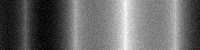

In [58]:
cubes = list(data_dir.glob('cubes/*.png'))
cylinders = list(data_dir.glob('cylinders/*.png'))

PIL.Image.open(str(cubes[int(100*np.random.random())]))



In [59]:
batch_size = 32
img_height = 50
img_width = 200
seed = 12

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = .2,
    subset = "training",
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size = batch_size,
    seed = seed,
    color_mode = 'grayscale'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = .2,
    subset = "validation",
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size = batch_size,
    seed = seed,
    color_mode = 'grayscale'
)


def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)
    label = parts[-2]

    image = tf.io.read_file(filename)

Found 400 files belonging to 2 classes.
Using 320 files for training.
Found 400 files belonging to 2 classes.
Using 80 files for validation.


In [60]:
batch_size = 32
img_height = 50
img_width = 200

normalization_layer = layers.Rescaling(1./255)
class_names = train_ds.class_names

print(class_names)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(50, 200)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()


['cubes', 'cylinders']
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_26 (Dense)            (None, 128)               1280128   
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 2)                 258       
                                                                 
Total params: 1,313,410
Trainable params: 1,313,410
Non-trainable params: 0
_________________________________________________________________


In [61]:
print(train_ds)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 50, 200, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [62]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
10/10 [==============================] - 1s 23ms/step - loss: 192.5899 - accuracy: 0.6906 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss:

In [63]:
model.save('Cube_Cyl_class_model')

INFO:tensorflow:Assets written to: Cube_Cyl_class_model/assets
